In [132]:
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Import data
train = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/train.csv", index_col="Loan_ID")
test = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/test.csv")

# Top 5 observations of the dataset
print (train.head(5))

         Gender Married Dependents     Education Self_Employed  \
Loan_ID                                                          
LP001002   Male      No          0      Graduate            No   
LP001003   Male     Yes          1      Graduate            No   
LP001005   Male     Yes          0      Graduate           Yes   
LP001006   Male     Yes          0  Not Graduate            No   
LP001008   Male      No          0      Graduate            No   

          ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                      
LP001002             5849                0.0         NaN             360.0   
LP001003             4583             1508.0       128.0             360.0   
LP001005             3000                0.0        66.0             360.0   
LP001006             2583             2358.0       120.0             360.0   
LP001008             6000                0.0       141.0             

In [142]:
# Count, mean, std deviation. min, max, quartiles
df = train.describe()
print(df)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  LoanAmount_log  
count      564.000000      592.000000  
mean         0.842199        4.857444  
std          0.364878        0.505142  
min          0.000000        2.197225  
25%          1.000000        4.605170  
50%          1.000000        4.852030  
75%          1.000000        5.123964  
max 

In [147]:
df1=train.Property_Area.value_counts()
print(df1)

df2=train.Gender.value_counts()
print('\n')
print(df2)
print("Id with maximum value:")
print(df2.idxmax())

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64
Id with maximum value:
Male


In [135]:
train.loc[(train["Gender"]=="Female") &
          (train["Education"]=="Not Graduate") &
          (train["Loan_Status"]=="Y"),
          ["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


In [151]:
def num_missing(x):
    return sum(x.isnull())

#Apply per column
print("Missing values per column")
#print(train.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column
print(train.isnull().sum())

n_missing_value_Self_Employed = train['Self_Employed'].isnull().sum()
print('\n')
print(n_missing_value_Self_Employed)
LoanAmount_have_missing_value = train['LoanAmount'].isnull().sum() > 0
print("Yes" if LoanAmount_have_missing_value else "No")

#Applying per row:
print("\nMissing values per row:")

#head used because it contains too many rows
print(train.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64


32
Yes

Missing values per row:
Loan_ID
LP001002    2
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


In [155]:
# Impute missing value of Gender (Male is more frequent category)
train['Gender'].fillna(train.Gender.value_counts().idxmax(),inplace=True)
n_missing_value_gender = train['Gender'].isnull().sum()
print(n_missing_value_gender)
df3=train.Gender.value_counts()
# 489 + 13 missing values = 502 males
print(df3)

0
Male      502
Female    112
Name: Gender, dtype: int64


In [137]:
#Absolute numbers
pd.crosstab(train["Credit_History"],train["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [138]:
#Percents
def percConvert(ser):
  return ser/float(ser[-1])

pd.crosstab(train["Credit_History"],train["Loan_Status"],margins=True).apply(percConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


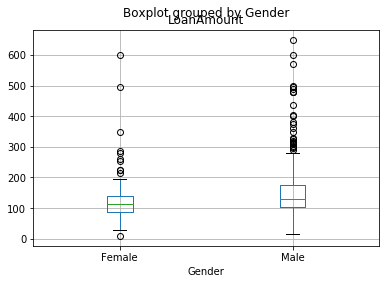

In [139]:
train.boxplot(column='LoanAmount', by = 'Gender')

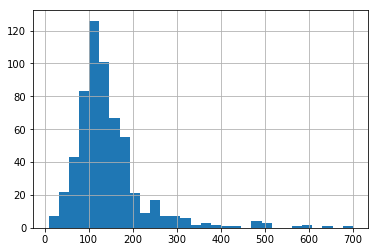

In [140]:
train.LoanAmount.hist(bins=30)

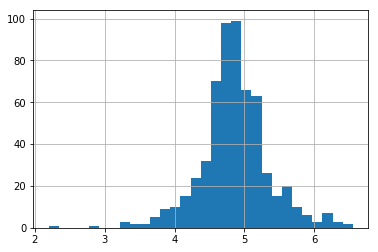

In [141]:
# Perform log transformation of TotalIncome to make it closer to normal
train['LoanAmount_log']= np.log(train['LoanAmount'])
train.LoanAmount_log.hist(bins=30)